# COVID-19 

We are given two DataFrames that provides information about COVID-19. Our task is to visualize this data to understand it better.
Let's import all required Data-sets.

In [13]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
import folium
import geopandas as gpd
import json

## Data Inputting and Data Cleaning.

In [14]:
df1=pd.read_csv('COVID-19.csv')
df2=pd.read_csv('2COVID-19.csv')
df1.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


In [15]:
df2.head()

,Entity,Code,Day since outbreak,Total confirmed cases of COVID-19
0,Afghanistan,AFG,35,1
1,Afghanistan,AFG,36,1
2,Afghanistan,AFG,37,1
3,Afghanistan,AFG,38,1
4,Afghanistan,AFG,39,1


It can be seen __df1__ can be modified to make it more workable. Particularly, Variable __Last Update__ will be changed. There are some countries for which data about provinces have also been given, these countires will be seperated from other ones.

In [16]:
df1['Last Update'] = pd.to_datetime(df1['Last Update'])

# a DataFrame that has countries for which provincial information is provided.
provinces_c = df1.dropna()
provinces_c.reset_index(inplace=True)
provinces_c.drop('index',axis=1,inplace=True)

# a DataFrame that only has countries for which provincial information is not provided.
countries_c = df1[pd.isnull(df1['Province/State'])]
countries_c.drop('Province/State', axis=1, inplace=True)
countries_c.head()


,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
1,Italy,2020-03-17 18:33:02,31506,2503,2941,41.8719,12.5674
2,Iran,2020-03-17 15:13:09,16169,988,5389,32.4279,53.6880
3,Spain,2020-03-17 20:53:02,11748,533,1028,40.4637,-3.7492
4,Germany,2020-03-17 18:53:02,9257,24,67,51.1657,10.4515
5,"Korea, South",2020-03-17 10:33:03,8320,81,1407,35.9078,127.7669


In [5]:
 provinces_c.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17 11:53:10,67799,3111,56003,30.9756,112.2707
1,France,France,2020-03-17 19:13:08,7652,148,12,46.2276,2.2137
2,United Kingdom,United Kingdom,2020-03-17 15:13:09,1950,55,52,55.3781,-3.4360
3,New York,US,2020-03-17 22:53:03,1706,13,0,42.1657,-74.9481
4,Netherlands,Netherlands,2020-03-17 15:13:11,1705,43,2,52.1326,5.2913


Now that we have seperated our data into 2, the data from provinces will be summed up to get information about its country.

In [6]:
df6=countries_c.drop('Last Update', axis=1)
df6.drop('Latitude', axis=1, inplace=True)
df6.drop('Longitude', axis=1, inplace=True)
df6=df6.groupby('Country/Region',as_index=False)['Confirmed','Deaths','Recovered'].sum()
df5=provinces_c.groupby('Country/Region',as_index=False)['Confirmed','Deaths','Recovered'].sum()
frames = [df5, df6]
countries_total = pd.concat(frames)
countries_total=countries_total.sort_values(by=['Confirmed'], ascending=False)
countries_total.head()

,Country/Region,Confirmed,Deaths,Recovered
2,China,81058,3230,68798
67,Italy,31506,2503,2941
63,Iran,16169,988,5389
128,Spain,11748,533,1028
47,Germany,9257,24,67


## VISUALIZATION

### Which countries have the most number of cases in March?

Let's make a bar chart to see 10 countries which have most confirmed cases.


Text(0.5, 0.98, '10 Countries with most Confirmed cases')

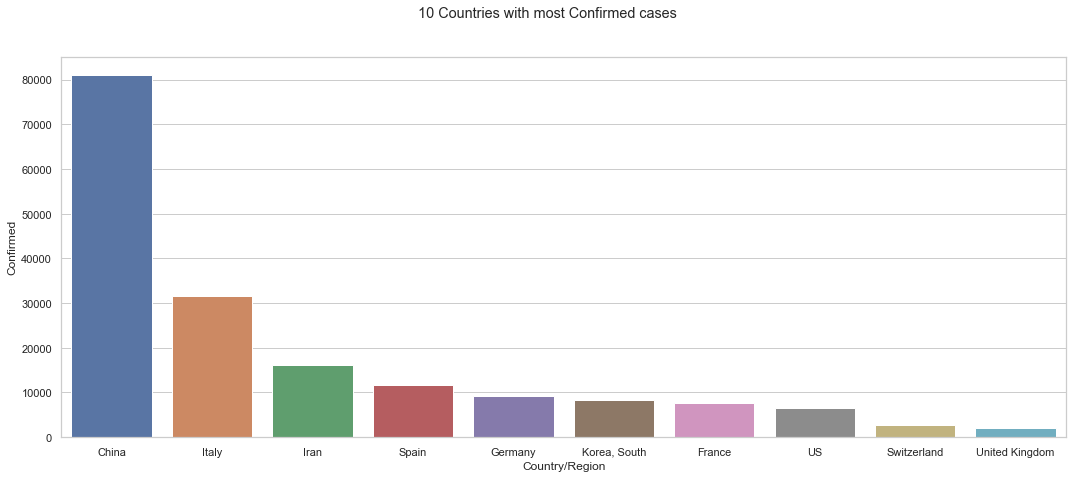

In [7]:
countries_total_sub = countries_total[:10]
plt.figure(figsize=(18, 7))
sns.set(style="whitegrid")
sns.barplot(x=countries_total_sub['Country/Region'],y=countries_total_sub['Confirmed'])
plt.suptitle('10 Countries with most Confirmed cases')
#sns.set(style="whitegrid")
#sns.barplot(x=countries_total['Country/Region'],y=countries_total['Confirmed'])
#plt.title('10 Countries with most Confirmed cases')

### How many Infected patients have recovered in Different Provinces Of China?

I have excluded the province __Hubei__ from the graph because their recovery amount is the highest, more than __60000__, creating a very unpleasent visualization. 

Text(0.5, 0.98, 'Confirmed cases of Recovery by Province excluding Hubei')

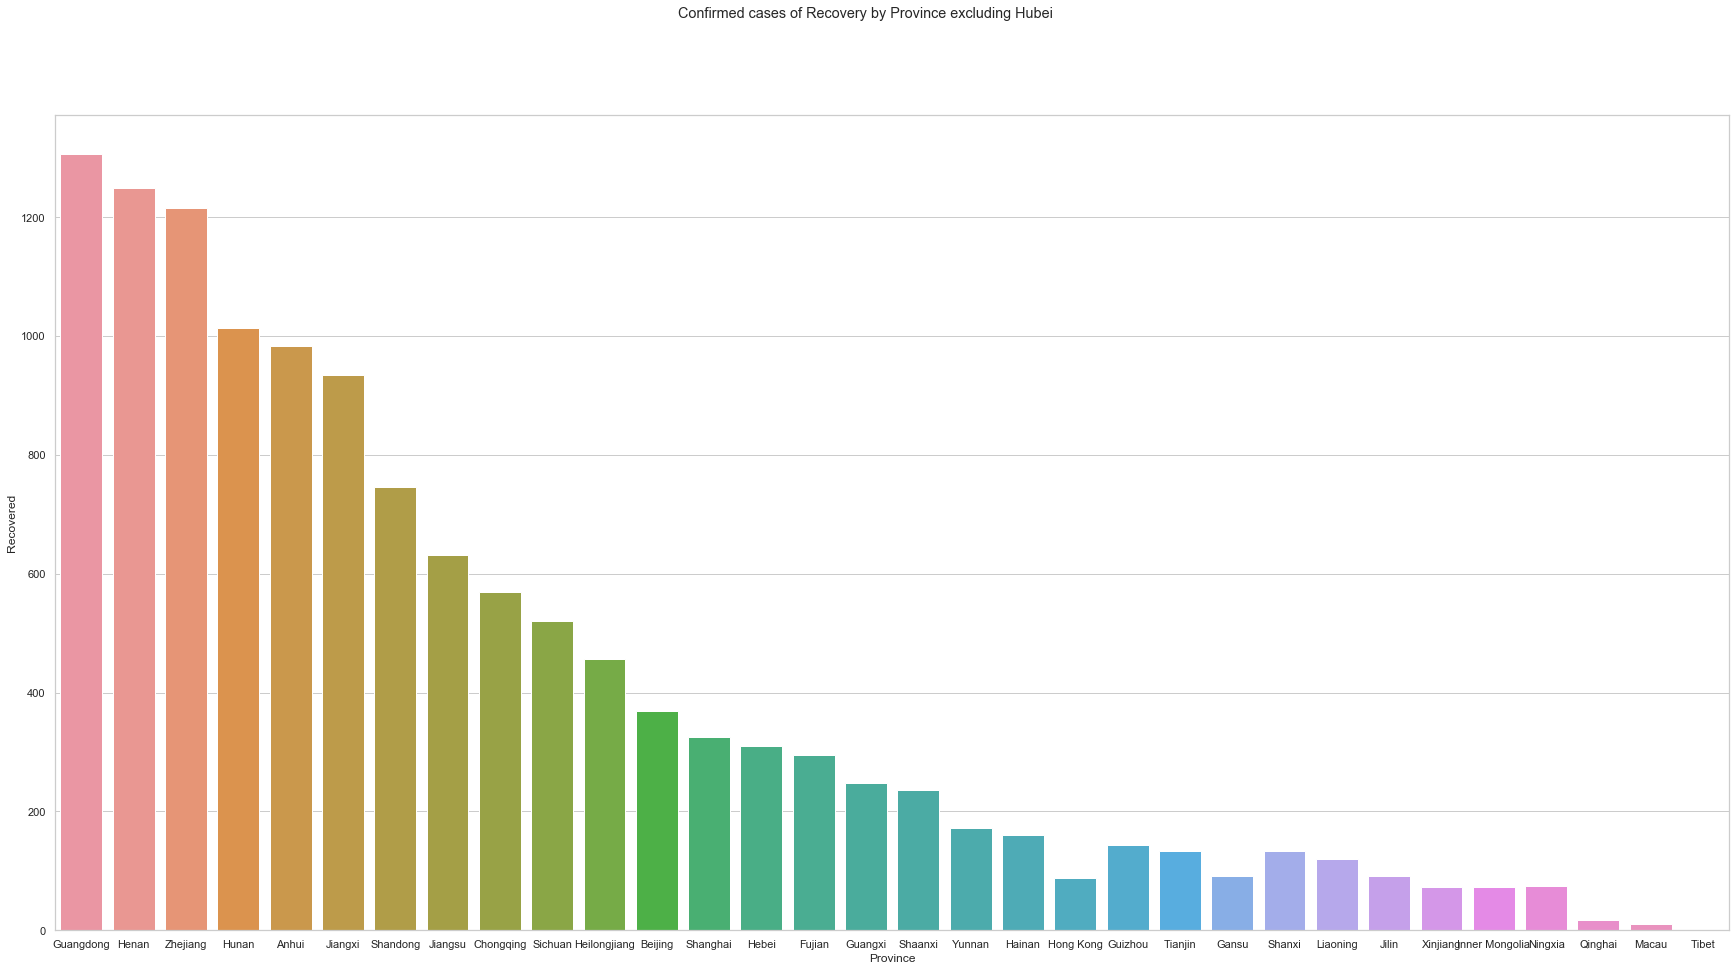

In [8]:
Chine_dic={'Province':[],'Recovered':[]}
for item in range(len(provinces_c['Country/Region'])):
    if provinces_c['Country/Region'][item] == 'China':
        prov = provinces_c['Province/State'][item]
        recov = provinces_c['Recovered'][item]
        Chine_dic['Province'].append(prov)
        Chine_dic['Recovered'].append(recov)
        
#DataFrame Consisting of China's Provinces and Recovery amount.
Chine_prov = pd.DataFrame(Chine_dic)

#Removing province Hubei
Chine_prov_1 = Chine_prov[1:]
#Chine_prov_1 = Chine_prov[:]#Uncomment this and comment out the line abouve to include Hubei 

#Plotting.
plt.figure(figsize=(30, 15))
sns.set(style="whitegrid")
sns.barplot(x=Chine_prov_1['Province'],y=Chine_prov_1['Recovered'])
plt.suptitle('Confirmed cases of Recovery by Province excluding Hubei')

We can see after Hubei, __Guangdong__ has highest amount of recovery.

### How has the number of patients infected with COVID-19 increased over time in the UK and other countries.

Lets create a DataFrame for UK and 9 other countries with highest confirmed cases.

In [9]:
# Cases by day for UK.
UK_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'United Kingdom':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        UK_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        UK_dic['Cases of COVID-19'].append(Cases)
df_UK = pd.DataFrame(UK_dic)

# Cases by day for US.
US_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'United States':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        US_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        US_dic['Cases of COVID-19'].append(Cases)
df_US = pd.DataFrame(US_dic)

# Cases by day for Iran.
Iran_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'Iran':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        Iran_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        Iran_dic['Cases of COVID-19'].append(Cases)
df_Iran = pd.DataFrame(Iran_dic)

# Cases by day for China.
Chine_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'China':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        Chine_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        Chine_dic['Cases of COVID-19'].append(Cases)
df_China = pd.DataFrame(Chine_dic)

# Cases by day for Italy.
Italy_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'Italy':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        Italy_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        Italy_dic['Cases of COVID-19'].append(Cases)        
df_Italy = pd.DataFrame(Italy_dic)

# Cases by day for Spain.
Spain_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'Spain':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        Spain_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        Spain_dic['Cases of COVID-19'].append(Cases)        
df_Spain = pd.DataFrame(Spain_dic)

# Cases by day for Germany.
Germany_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'Germany':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        Germany_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        Germany_dic['Cases of COVID-19'].append(Cases)        
df_Germany = pd.DataFrame(Germany_dic)

# Cases by day for Sout_Korea.
South_Korea_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'South Korea':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        South_Korea_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        South_Korea_dic['Cases of COVID-19'].append(Cases)        
df_South_Korea = pd.DataFrame(South_Korea_dic)

# Cases by day for France.
France_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'France':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        France_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        France_dic['Cases of COVID-19'].append(Cases)        
df_France = pd.DataFrame(France_dic)

# Cases by day for Switzerland.
Switzerland_dic={'Days Since Outbreak':[],'Cases of COVID-19':[]}
for item in range(len(df2['Entity'])):
    if df2['Entity'][item] == 'Switzerland':
        Days_Since_Outbreak = df2['Day since outbreak'][item]
        Cases = df2['Total confirmed cases of COVID-19'][item]
        Switzerland_dic['Days Since Outbreak'].append(Days_Since_Outbreak)
        Switzerland_dic['Cases of COVID-19'].append(Cases)        
df_Switzerland = pd.DataFrame(Switzerland_dic)

Let's make a line plot for UK and then for China.

Text(0.5, 0.98, 'Increase in COVID-19 cases in UK after January 21st')

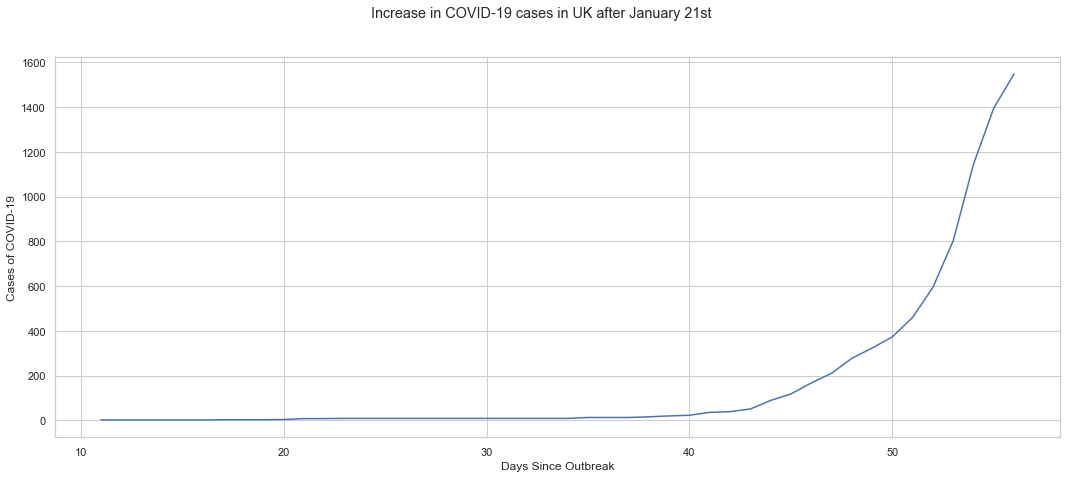

In [10]:
plt.figure(figsize=(18, 7))
sns.set(style="whitegrid")
sns.lineplot(x="Days Since Outbreak", y="Cases of COVID-19", data=df_UK)
plt.suptitle('Increase in COVID-19 cases in UK after January 21st')

As it can be seen, Cases were relatively low until the 40 days. After which we see an exponential increase.

Text(0.5, 0.98, 'Increase in COVID-19 cases in China after January 21st')

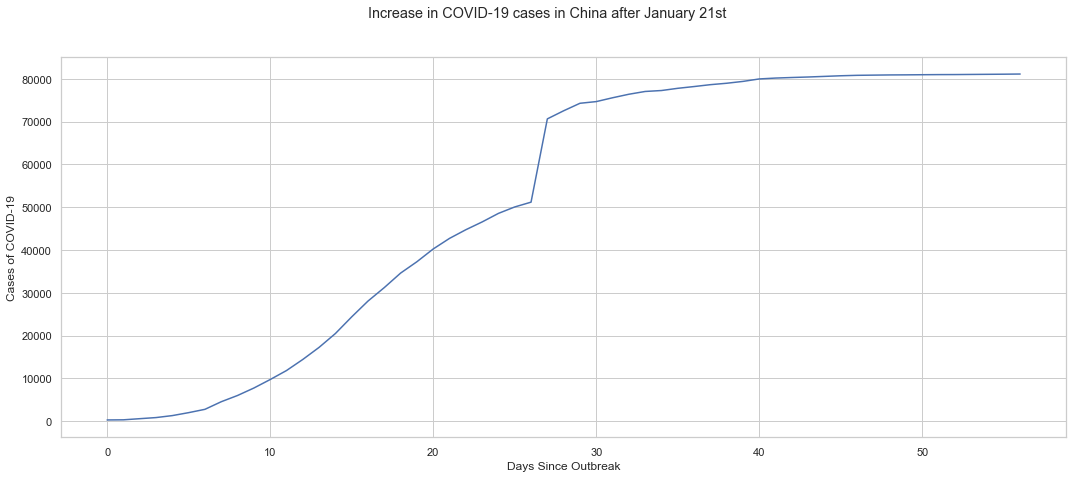

In [11]:
plt.figure(figsize=(18, 7))
sns.set(style="whitegrid")
sns.lineplot(x="Days Since Outbreak", y="Cases of COVID-19", data=df_China)
plt.suptitle('Increase in COVID-19 cases in China after January 21st')

It seems we see an exponential raise in daily number of cases in China untill day 30. After which, Due to preventive and protective measures __China__ took, the curve has relatively flattened. 

Now we will show spread of COVID-19 in 9 countries with highest number of cases. __China__ is excluded in this graph as it makes a very unpleasent visualization. 

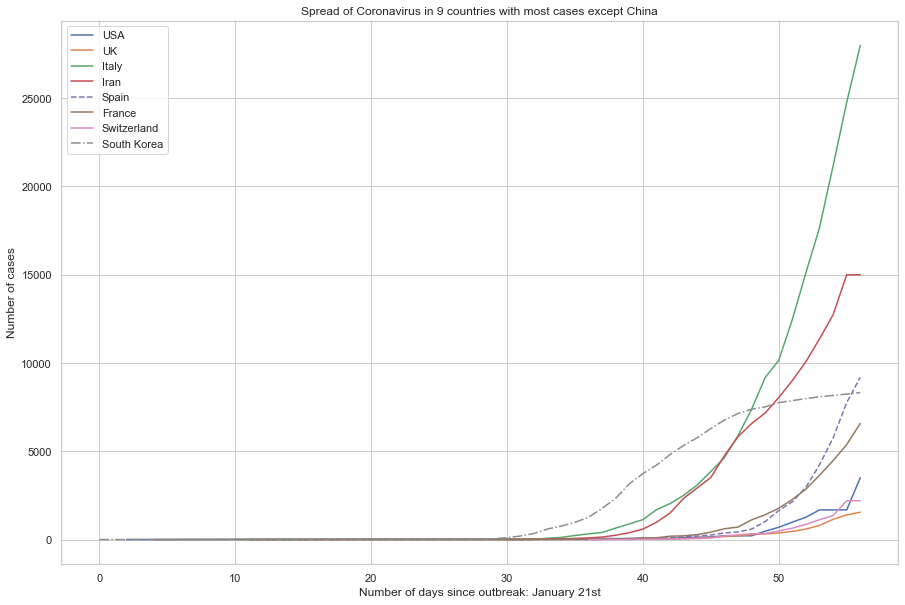

In [12]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
ax.set_title('Spread of Coronavirus in 9 countries with most cases except China')
plt.xlabel('Number of days since outbreak: January 21st') 
plt.ylabel('Number of cases')
#Please uncomment the line below if want to include China.
#ax.plot(df_China['Days Since Outbreak'],df_China['Cases of COVID-19'], label='China')
ax.plot(df_US['Days Since Outbreak'],df_US['Cases of COVID-19'], label='USA')
ax.plot(df_UK['Days Since Outbreak'],df_UK['Cases of COVID-19'], label='UK')
ax.plot(df_Italy['Days Since Outbreak'],df_Italy['Cases of COVID-19'], label='Italy')
ax.plot(df_Iran['Days Since Outbreak'],df_Iran['Cases of COVID-19'], label='Iran')
ax.plot(df_Spain['Days Since Outbreak'],df_Spain['Cases of COVID-19'],'--', label='Spain')
ax.plot(df_France['Days Since Outbreak'],df_France['Cases of COVID-19'], label='France')
ax.plot(df_Switzerland['Days Since Outbreak'],df_Switzerland['Cases of COVID-19']\
        , label='Switzerland')
ax.plot(df_South_Korea['Days Since Outbreak'],df_South_Korea['Cases of COVID-19'],'-.', label='South Korea')
plt.legend(loc='best')
plt.show()


The graph shows interesting information. It clearly shows, Outside of China, __Italy__ has the highest amount of COVID-19 spread. The graph shows cases first started to rise exponentially in __South Korea__ around day 30 after outbreak. Slowly after, cases started to rise at a similar exponential rate in __Iran__ and __Italy__. While every country's number of cases increase by the day, __South Korea__ and __China's__ curve flattens relatively around day 45 and 30 respectively. 